# Model1: Predicting NBA draft chances for college basketball players

## Import dictionaries

In [1]:
#import libraries

import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import scipy.stats       as stats
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Importing df

In [2]:
# reading college data clean file from csv

college_players = pd.read_csv('college_data.csv', index_col = 0)
college_players.head()


,player_name,school,GP,Min_per,ORtg,usg,eFG,TS_per,FT_per,twoP_per,...,bpm,mp,oreb,dreb,ast,stl,blk,pts,role,drafted
1,DeAndrae Ross,Troy,7,11.5,67.1,16.9,34.5,36.11,0.500,0.364,...,-10.394000,18.8571,0.5714,1.1429,1.4286,0.1429,0.0000,3.2857,Wing G,No
2,Pooh Williams,Utah St.,33,64.5,105.6,18.7,48.1,52.40,0.815,0.394,...,1.125160,26.0000,0.1515,1.4848,2.0909,0.2121,0.0909,8.6667,Combo G,No
11,Dana Smith,Longwood,27,81.8,99.8,27.7,49.9,53.76,0.658,0.483,...,-0.441037,32.7037,2.1481,4.9259,2.4074,0.8148,0.4815,17.5556,Wing F,No
26,Carlos Strong,Boston University,35,76.2,118.1,16.4,58.8,60.93,0.682,0.478,...,6.077490,30.6857,1.3429,3.2286,1.8000,1.6571,0.4000,10.8571,Combo G,No
27,Sherrod Smith,Boston University,29,9.5,60.7,6.9,8.3,14.93,0.300,0.100,...,-4.128490,4.6207,0.1379,0.5862,0.2069,0.1034,0.0345,0.1724,Wing G,No


## EDA 

In [3]:
college_players.describe()

,GP,Min_per,ORtg,usg,eFG,TS_per,FT_per,twoP_per,TP_per,yr,...,pick,drtg,bpm,mp,oreb,dreb,ast,stl,blk,pts
count,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,...,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000,19087.000000
mean,22.686174,47.077744,97.655048,18.958846,48.048630,51.095655,0.658370,0.467274,0.256464,3.222612,...,0.889454,103.023824,-1.110605,20.858660,0.935225,2.418413,1.371209,0.672615,0.351143,7.475572
std,9.773528,25.313199,16.683619,5.234725,10.438359,9.644584,0.196238,0.125742,0.172125,1.053109,...,5.863312,7.087601,4.835184,9.171534,0.773714,1.512961,1.241413,0.486114,0.470564,5.094803
min,1.000000,5.000000,0.000000,2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,64.954400,-22.932800,2.869600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,24.000000,88.500000,15.300000,42.900000,46.420000,0.580000,0.407000,0.125000,3.000000,...,0.000000,98.574200,-4.284495,12.718800,0.363600,1.250000,0.458300,0.300000,0.062500,3.125000
50%,26.000000,48.600000,99.600000,18.700000,48.700000,52.010000,0.692000,0.474000,0.300000,4.000000,...,0.000000,103.237000,-1.022020,21.466700,0.700000,2.153800,1.000000,0.575800,0.193500,6.533300
75%,31.000000,69.400000,108.700000,22.500000,54.100000,56.950000,0.780000,0.537000,0.367000,4.000000,...,0.000000,107.766000,2.139905,28.888900,1.322600,3.290300,1.900000,0.961500,0.454500,11.032800
max,41.000000,98.600000,195.900000,42.800000,150.000000,150.000000,1.000000,1.000000,1.000000,4.000000,...,60.000000,128.623000,18.030800,39.942900,6.111100,11.545500,10.000000,5.000000,5.258100,30.090900


- Nothing abnormal stands out from descriptive statistics above. We are going to look at the columns graphically to look for trends and any abnormalities.

### Heatmap correlation matrix

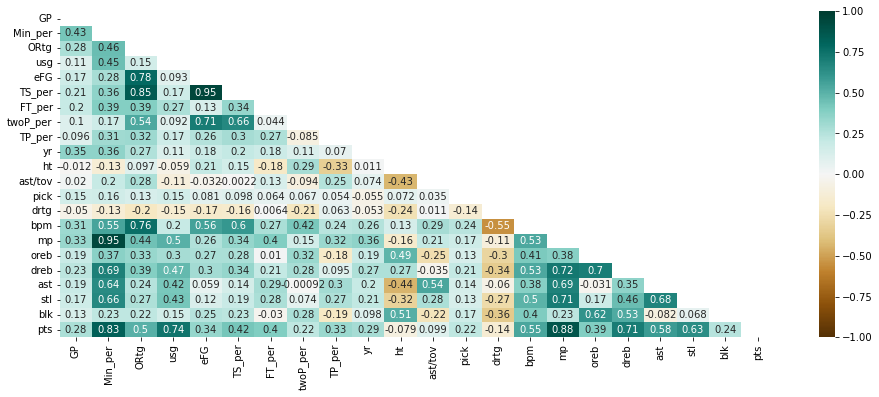

In [4]:

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(college_players.corr(), dtype=np.bool_))
heatmap = sns.heatmap(college_players.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

In order to avoid multicolinearity will drop 1 feature for these pairs that are over 80%correlated

- In this case will drop Minutes played(mp), Minutes percentage(Min_per), True Shooting(TS).


In [5]:
college_players.drop(['mp','Min_per','TS_per'], axis = 1, inplace= True) 

In [6]:
college_players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19087 entries, 1 to 28325
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   player_name  19087 non-null  object 
 1   school       19087 non-null  object 
 2   GP           19087 non-null  int64  
 3   ORtg         19087 non-null  float64
 4   usg          19087 non-null  float64
 5   eFG          19087 non-null  float64
 6   FT_per       19087 non-null  float64
 7   twoP_per     19087 non-null  float64
 8   TP_per       19087 non-null  float64
 9   yr           19087 non-null  int64  
 10  ht           19087 non-null  int64  
 11  ast/tov      19087 non-null  float64
 12  pick         19087 non-null  float64
 13  drtg         19087 non-null  float64
 14  bpm          19087 non-null  float64
 15  oreb         19087 non-null  float64
 16  dreb         19087 non-null  float64
 17  ast          19087 non-null  float64
 18  stl          19087 non-null  float64
 19  blk 

In [7]:
#target variable seems quite imbalanced, however will try a first baseline model so we can compare afterwards applying SMOTE
college_players['drafted'].value_counts()


No     18515
Yes      572
Name: drafted, dtype: int64

### Feature selection

In [8]:
#features to drop 
college_players= college_players.drop(['pick','school','player_name'], axis = 1)


In [9]:
# asign categorical value to college year

def college_year_num(college_players1):
    
    if (college_players1['yr'] == 1):
        return 'Freshman'
    elif (college_players1['yr'] == 2):
        return 'Sophomore'
    elif (college_players1['yr'] == 3):
        return 'Junior'
    elif (college_players1['yr'] == 4):
        return 'Senior'
    else:
        return 'null'
    
college_players['yr'] = college_players.apply(college_year_num, axis = 1)

In [10]:
college_players["yr"].unique()

array(['Junior', 'Senior', 'Sophomore', 'Freshman'], dtype=object)

In [11]:
college_players.reset_index(drop=True, inplace=True)

In [12]:
college_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19087 entries, 0 to 19086
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GP        19087 non-null  int64  
 1   ORtg      19087 non-null  float64
 2   usg       19087 non-null  float64
 3   eFG       19087 non-null  float64
 4   FT_per    19087 non-null  float64
 5   twoP_per  19087 non-null  float64
 6   TP_per    19087 non-null  float64
 7   yr        19087 non-null  object 
 8   ht        19087 non-null  int64  
 9   ast/tov   19087 non-null  float64
 10  drtg      19087 non-null  float64
 11  bpm       19087 non-null  float64
 12  oreb      19087 non-null  float64
 13  dreb      19087 non-null  float64
 14  ast       19087 non-null  float64
 15  stl       19087 non-null  float64
 16  blk       19087 non-null  float64
 17  pts       19087 non-null  float64
 18  role      19087 non-null  object 
 19  drafted   19087 non-null  object 
dtypes: float64(15), int64(2), ob

### plotting data in a scater matrix

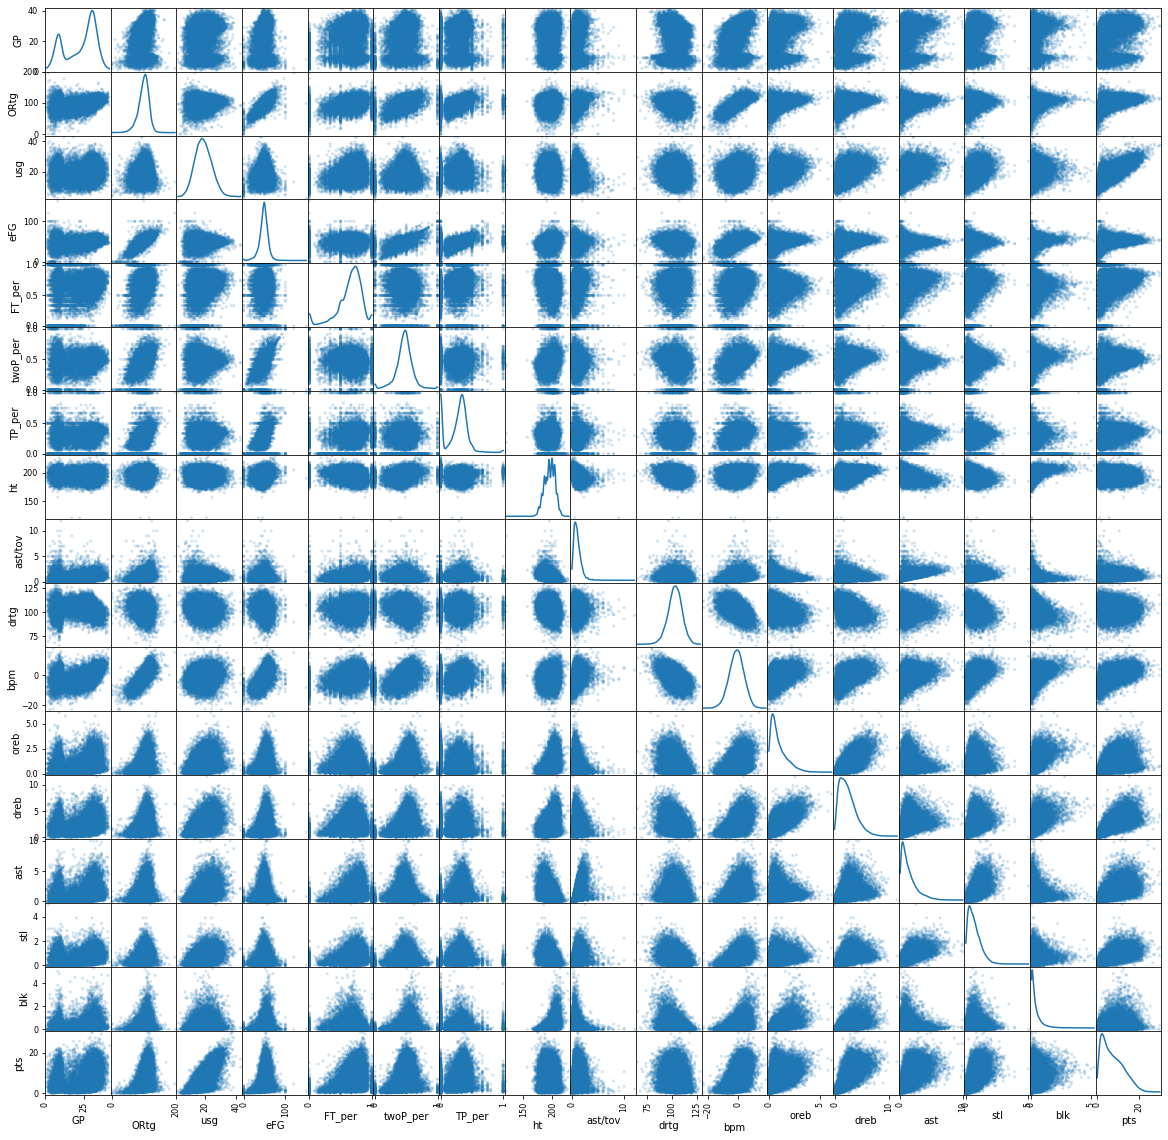

In [13]:
from pandas.plotting import scatter_matrix
scatter_matrix(college_players, alpha=0.2, figsize = (20,20), diagonal = "kde");

## Preparing data set for modeling

### Extracting numerical values

In [14]:
from sklearn.preprocessing import Normalizer

X = college_players.select_dtypes(include = np.number)

### Trying different scalers

In [15]:
transformer = Normalizer()
transformer.fit(X)
x_normalized = transformer.transform(X)

In [16]:
x_nor = pd.DataFrame(x_normalized, columns=X.columns)

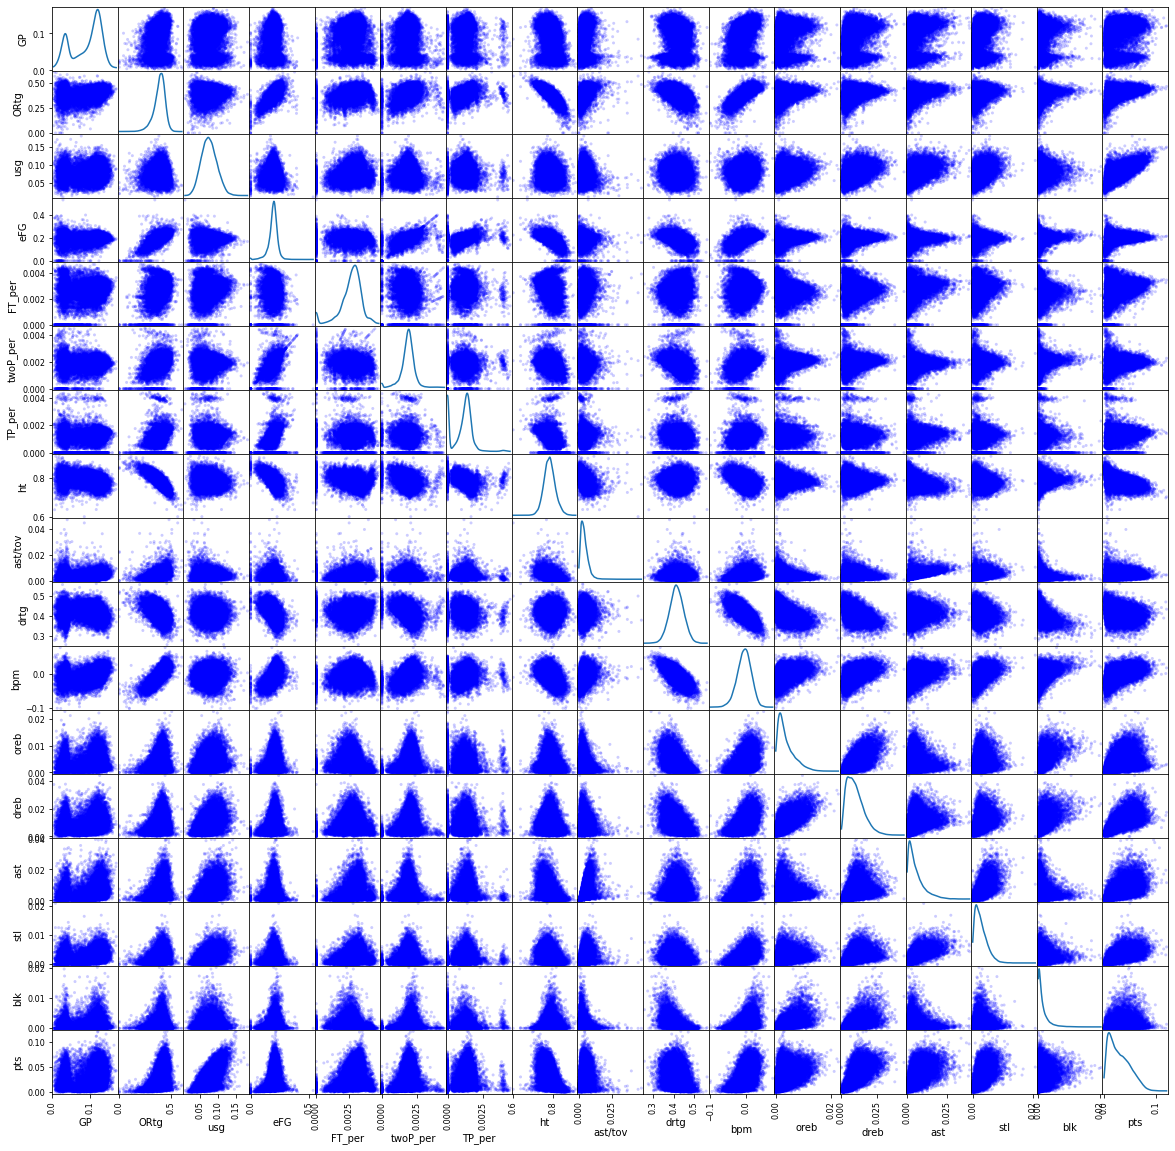

In [17]:
scatter_matrix(x_nor, alpha=0.2, figsize = (20,20), diagonal = "kde", color ="blue");

In [18]:
x_nor.head()

,GP,ORtg,usg,eFG,FT_per,twoP_per,TP_per,ht,ast/tov,drtg,bpm,oreb,dreb,ast,stl,blk,pts
0,0.030110,0.288621,0.072693,0.148397,0.002151,0.001566,0.000955,0.804354,0.003309,0.489095,-0.044708,0.002458,0.004916,0.006145,0.000615,0.000000,0.014133
1,0.132846,0.425106,0.075279,0.193633,0.003281,0.001586,0.001481,0.776947,0.006460,0.391698,0.004529,0.000610,0.005977,0.008417,0.000854,0.000366,0.034889
2,0.107048,0.395681,0.109823,0.197841,0.002609,0.001915,0.001439,0.773124,0.003068,0.421456,-0.001749,0.008517,0.019530,0.009545,0.003230,0.001909,0.069603
3,0.137948,0.465475,0.064638,0.231752,0.002688,0.001884,0.001860,0.748859,0.005283,0.378013,0.023954,0.005293,0.012725,0.007094,0.006531,0.001577,0.042792
4,0.127483,0.266835,0.030332,0.036486,0.001319,0.000440,0.000000,0.848420,0.026363,0.435252,-0.018149,0.000606,0.002577,0.000910,0.000455,0.000152,0.000758


### StandardScaler

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
transformer = StandardScaler()
transformer.fit(X)
x_standarized = transformer.transform(X)

In [21]:
x_std = pd.DataFrame(x_standarized, columns=X.columns)

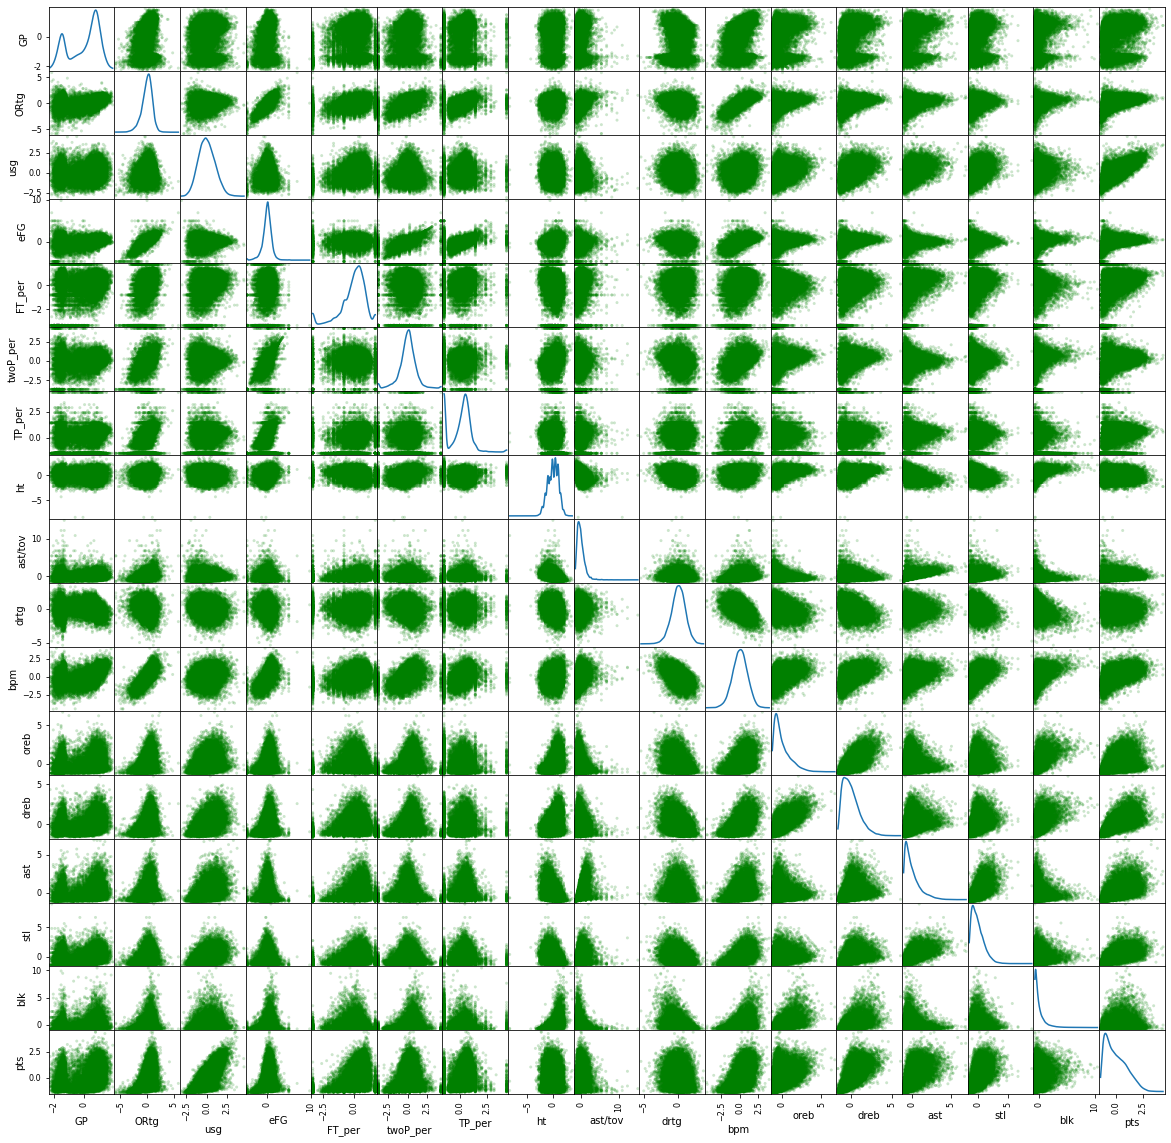

In [22]:
scatter_matrix(x_std, alpha=0.2, figsize = (20,20), diagonal = "kde", color ="green");

In [23]:
x_std.head()

,GP,ORtg,usg,eFG,FT_per,twoP_per,TP_per,ht,ast/tov,drtg,bpm,oreb,dreb,ast,stl,blk,pts
0,-1.605007,-1.831488,-0.393316,-1.298000,-0.807053,-0.821342,-0.200235,-0.927268,-0.356798,1.507344,-1.920018,-0.470244,-0.843080,0.046232,-1.089721,-0.746238,-0.822403
1,1.055309,0.476225,-0.049449,0.004921,0.798182,-0.582752,0.648009,-0.251691,0.785324,-0.807463,0.462407,-1.012966,-0.617093,0.579750,-0.947364,-0.553060,0.233799
2,0.441390,0.128570,1.669884,0.177367,-0.001887,0.125068,0.618960,-0.026499,-0.350583,0.462394,0.138482,1.567643,1.657380,0.834708,0.292502,0.277030,1.978544
3,1.259949,1.225483,-0.488834,1.030014,0.120416,0.085303,1.252238,-0.589480,0.423994,-1.003825,1.486662,0.526921,0.535511,0.345415,2.025269,0.103829,0.663738
4,0.646030,-2.215108,-2.303686,-3.808038,-1.826249,-2.920942,-1.490030,-0.251691,6.790321,-0.566077,-0.624167,-1.030544,-1.211043,-0.937914,-1.170980,-0.672920,-1.433493


After alysing both scalers, I have decided to stick first to the normalizer as data seems to adjust better. I might come back later and use the StandardScaler data for better results.

### Getting dummies

In [24]:
cat = college_players.select_dtypes(include = object)

In [25]:
cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19087 entries, 0 to 19086
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   yr       19087 non-null  object
 1   role     19087 non-null  object
 2   drafted  19087 non-null  object
dtypes: object(3)
memory usage: 447.5+ KB


In [26]:
categorical = pd.get_dummies(cat,columns=["yr", "role"])


In [27]:
categorical

,drafted,yr_Freshman,yr_Junior,yr_Senior,yr_Sophomore,role_C,role_Combo G,role_PF/C,role_Pure PG,role_Scoring PG,role_Stretch 4,role_Wing F,role_Wing G
0,No,0,1,0,0,0,0,0,0,0,0,0,1
1,No,0,0,1,0,0,1,0,0,0,0,0,0
2,No,0,0,1,0,0,0,0,0,0,0,1,0
3,No,0,0,1,0,0,1,0,0,0,0,0,0
4,No,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19082,No,0,0,0,1,0,1,0,0,0,0,0,0
19083,No,1,0,0,0,0,1,0,0,0,0,0,0
19084,No,1,0,0,0,0,0,0,0,0,0,0,1
19085,No,1,0,0,0,0,0,1,0,0,0,0,0


### Isolating the target value

In [29]:
categorical_clean = categorical.drop("drafted", axis = 1)

In [30]:
y = categorical["drafted"]

### Concatenating x_nor and categorical_clean

In [31]:
X_full = pd.concat([x_nor, categorical_clean], axis = 1)

In [32]:
X_full

,GP,ORtg,usg,eFG,FT_per,twoP_per,TP_per,ht,ast/tov,drtg,...,yr_Senior,yr_Sophomore,role_C,role_Combo G,role_PF/C,role_Pure PG,role_Scoring PG,role_Stretch 4,role_Wing F,role_Wing G
0,0.030110,0.288621,0.072693,0.148397,0.002151,0.001566,0.000955,0.804354,0.003309,0.489095,...,0,0,0,0,0,0,0,0,0,1
1,0.132846,0.425106,0.075279,0.193633,0.003281,0.001586,0.001481,0.776947,0.006460,0.391698,...,1,0,0,1,0,0,0,0,0,0
2,0.107048,0.395681,0.109823,0.197841,0.002609,0.001915,0.001439,0.773124,0.003068,0.421456,...,1,0,0,0,0,0,0,0,1,0
3,0.137948,0.465475,0.064638,0.231752,0.002688,0.001884,0.001860,0.748859,0.005283,0.378013,...,1,0,0,1,0,0,0,0,0,0
4,0.127483,0.266835,0.030332,0.036486,0.001319,0.000440,0.000000,0.848420,0.026363,0.435252,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19082,0.030366,0.268087,0.110185,0.115390,0.003978,0.001215,0.000620,0.789513,0.002314,0.523273,...,0,1,0,1,0,0,0,0,0,0
19083,0.037959,0.364832,0.088150,0.207933,0.002876,0.002054,0.001404,0.822454,0.004218,0.367893,...,0,0,0,1,0,0,0,0,0,0
19084,0.035478,0.436379,0.061495,0.256230,0.002409,0.002523,0.001734,0.768690,0.003639,0.383096,...,0,0,0,0,0,0,0,0,0,1
19085,0.036737,0.368999,0.053880,0.215930,0.000000,0.002298,0.001359,0.828614,0.003628,0.354581,...,0,0,0,0,1,0,0,0,0,0


In [33]:
X_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19087 entries, 0 to 19086
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   GP               19087 non-null  float64
 1   ORtg             19087 non-null  float64
 2   usg              19087 non-null  float64
 3   eFG              19087 non-null  float64
 4   FT_per           19087 non-null  float64
 5   twoP_per         19087 non-null  float64
 6   TP_per           19087 non-null  float64
 7   ht               19087 non-null  float64
 8   ast/tov          19087 non-null  float64
 9   drtg             19087 non-null  float64
 10  bpm              19087 non-null  float64
 11  oreb             19087 non-null  float64
 12  dreb             19087 non-null  float64
 13  ast              19087 non-null  float64
 14  stl              19087 non-null  float64
 15  blk              19087 non-null  float64
 16  pts              19087 non-null  float64
 17  yr_Freshman 

### Importing libraries for modeling

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Model 1 - Normalizer X

### Defining LogisticRegression

In [35]:
lr =  LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr')

### Splitting dataset into train and test set

In [36]:
X_train, X_test, y_train, y_test = train_test_split (X_full, y, test_size = 0.3, random_state=40)

### Fitting the model to our training data set

In [37]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=400, multi_class='ovr', random_state=0)

## Evaluating Model 1

### Predicting the response for test dataset

In [38]:
y_pred=lr.predict(X_test)

### Obtaining the accuracy of the prediction

In [39]:
accuracy_score(y_test,y_pred)

0.9694429893486991

### Creating the confusion matrix

In [40]:
confusion_matrix(y_test,y_pred)

array([[5548,    0],
       [ 175,    4]])

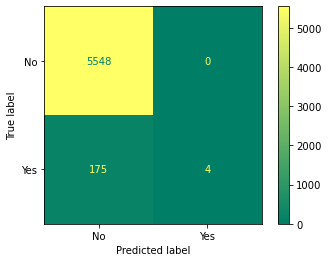

In [41]:
plot_confusion_matrix(lr, X_test, y_test, cmap="summer");

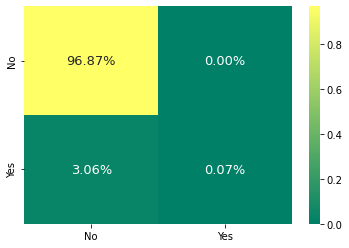

In [42]:
cnfmat = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cnfmat, columns = np.unique(y_test), index = np.unique(y_test))
sns.heatmap(df_cm/df_cm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='summer',
            annot_kws = {'size':13}
           );

### Checking balance for target variable

In [43]:
#current balance for target variable
college_players['drafted'].value_counts()

No     18515
Yes      572
Name: drafted, dtype: int64

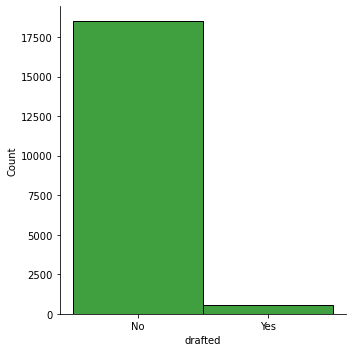

In [44]:
sns.displot(college_players['drafted'], color="green");

As target variable data was very imbalanced towards the "No" prediction, our first baseline model is remarkably good at predicting "No" and very deficient at doing so for "Yes"

I will apply an imbalanced technique and run it again

## Model 2 - Implementing SMOTE method

In [45]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

### Applying SMOTE to X and Y

In [46]:
X_sm, y_sm =smote.fit_resample(X_full,y)

### Splitting X_sm and y_sm into train and test set

In [47]:
X_sm_train, X_sm_test, y_sm_train, y_sm_test = train_test_split (X_sm, y_sm, test_size = 0.3, random_state=40)


### Analysing the change in the distribution

In [48]:
y_train.value_counts()

No     12967
Yes      393
Name: drafted, dtype: int64

In [49]:
y_sm_train.value_counts()

No     12976
Yes    12945
Name: drafted, dtype: int64

### Fitting the model to our smote training dataset

In [50]:
lr.fit(X_sm_train,y_sm_train)

LogisticRegression(max_iter=400, multi_class='ovr', random_state=0)

## Evaluating Model 2

### Predicting the response for smote test dataset

In [51]:
y_pred_sm = lr.predict(X_sm_test)

### Obtaining the accuracy of the prediction

In [52]:
accuracy_score(y_sm_test,y_pred_sm)

0.9401386263390044

### Creating the new confusion matrix

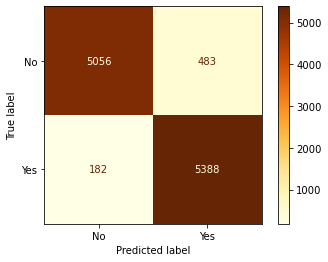

In [53]:
plot_confusion_matrix(lr, X_sm_test, y_sm_test, cmap="YlOrBr");

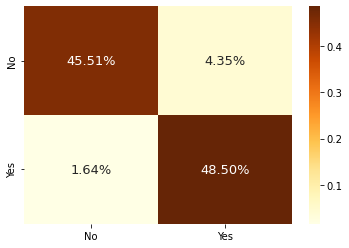

In [54]:
cnfmat = confusion_matrix(y_sm_test, y_pred_sm)
df_cm = pd.DataFrame(cnfmat, columns = np.unique(y_sm_test), index = np.unique(y_sm_test))
sns.heatmap(df_cm/df_cm.sum().sum(),
           annot=True,
            fmt='.2%',
            cmap='YlOrBr',
            annot_kws = {'size':13}
           );

## Calculating feature importance

In [56]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_sm_train, y_sm_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

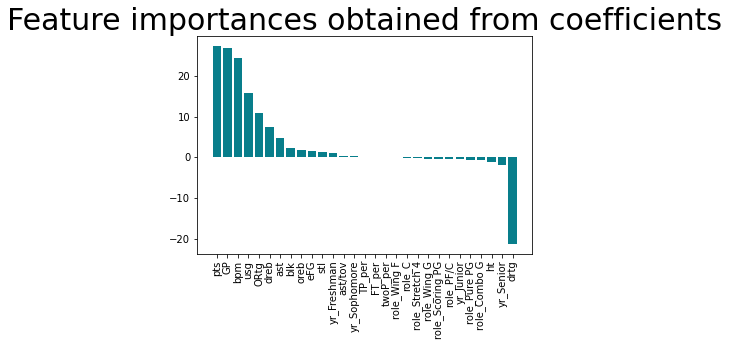

In [58]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=30)
plt.xticks(rotation='vertical')
plt.show()